In [4]:
#import Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
austin_df = pd.read_csv('austin_311_service_requests.csv',low_memory=False)
austin_df.head()

,city,close_date,complaint_description,complaint_type,council_district_code,county,created_date,incident_address,incident_zip,last_update_date,...,map_tile,owning_department,source,state_plane_x_coordinate,state_plane_y_coordinate,status,status_change_date,street_name,street_number,unique_key
0,AUSTIN,2015-01-20 10:41:48,Loose Dog,ACLONAG,3.0,TRAVIS,2015-01-20 10:41:48,1305 CORIANDER DR AUSTIN TX,78741.0,2015-01-27 12:51:06,...,ML18,Animal Services Office,Phone,3131141.68710771,1.005532e+07,Duplicate (closed),2015-01-20 10:41:48,CORIANDER,1305.0,15-00012439
1,AUSTIN,2016-06-01 10:58:13,Loose Dog,ACLONAG,7.0,TRAVIS,2016-05-22 10:00:49,3104 STONEWAY DR AUSTIN TX 78757,78757.0,2016-06-01 09:58:30,...,MJ29,Animal Services Office,Phone,3112134.24930453,1.010083e+07,Closed,2016-06-01 10:58:13,STONEWAY,3104.0,16-00123310
2,AUSTIN,2014-01-06 19:30:00,Loose Animal (not dog),ACLOANIM,2.0,TRAVIS,2014-01-06 18:04:00,4100 SMITH SCHOOL RD AUSTIN TX,78744.0,2014-01-06 18:32:00,...,MK16,Animal Services Office,Phone,3124825.4024878,1.004597e+07,Closed,2014-01-06 19:30:00,SMITH SCHOOL,4100.0,14-00003554
3,AUSTIN,2014-11-19 10:46:48,Austin Code - Request Code Officer,CODECOMP,7.0,TRAVIS,2014-11-15 15:43:41,12710 PALFREY DR AUSTIN TX 78727,78727.0,2014-11-19 10:46:48,...,ML35,Austin Code Department,Web,3124206.25,1.012812e+07,Closed,2014-11-19 10:46:48,PALFREY,12710.0,14-00247505
4,AUSTIN,2014-08-25 21:21:00,Animal - Proper Care,ACPROPER,1.0,TRAVIS,2014-07-28 17:33:00,6703 TULANE DR AUSTIN TX,78723.0,2014-08-25 20:23:00,...,MM26,Animal Services Office,Phone,3137129.998,1.008721e+07,Closed,2014-08-25 21:21:00,TULANE,6703.0,14-00156342


In [6]:
austin_df = austin_df[["city", "county", "incident_zip", "created_date", "owning_department", "complaint_description", "complaint_type"]]
austin_df.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [7]:
austin_df = austin_df.rename(columns={"city":"City", "county":"County","incident_zip":"Incident Zip",
                                      "created_date":"Date", "owning_department":"Department",
                                      "complaint_description":"Complaint Description","complaint_type":"Type of Complaint"})
austin_df.head(10)

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER
5,AUSTIN,TRAVIS,78702.0,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER
6,AUSTIN,TRAVIS,78744.0,2015-08-25 11:03:04,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
7,AUSTIN,TRAVIS,78749.0,2014-08-26 13:01:00,Austin Water Utility,Water Waste Report,WWREPORT
8,AUSTIN,TRAVIS,78702.0,2015-06-19 16:31:06,Parks & Recreation Department,Park Maintenance - Pool Issues,PRMTPOOL
9,AUSTIN,TRAVIS,78759.0,2017-08-01 12:55:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP


In [8]:
austin_df.count()

City                     454982
County                   452747
Incident Zip             454963
Date                     452741
Department               459305
Complaint Description    459305
Type of Complaint        459305
dtype: int64

In [9]:
austin_df.replace('', np.nan, inplace=True)
austin_df.head()

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [10]:
austin_df.count()

City                     454982
County                   452747
Incident Zip             454963
Date                     452741
Department               459305
Complaint Description    459305
Type of Complaint        459305
dtype: int64

In [11]:
cleanaustin_df = austin_df.dropna(how="any")
cleanaustin_df.count()

City                     445845
County                   445845
Incident Zip             445845
Date                     445845
Department               445845
Complaint Description    445845
Type of Complaint        445845
dtype: int64

In [12]:
cleanaustin_df.head(20)

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER
5,AUSTIN,TRAVIS,78702.0,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER
6,AUSTIN,TRAVIS,78744.0,2015-08-25 11:03:04,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
7,AUSTIN,TRAVIS,78749.0,2014-08-26 13:01:00,Austin Water Utility,Water Waste Report,WWREPORT
8,AUSTIN,TRAVIS,78702.0,2015-06-19 16:31:06,Parks & Recreation Department,Park Maintenance - Pool Issues,PRMTPOOL
9,AUSTIN,TRAVIS,78759.0,2017-08-01 12:55:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP


In [13]:
cleanaustin_df['City'].value_counts()

AUSTIN              434876
PFLUGERVILLE          2072
DEL VALLE             1747
AUSTIN 5 ETJ          1204
MANOR                 1088
Austin                 538
austin                 498
CEDAR PARK             437
OTHER                  365
LEANDER                294
ROUND ROCK             252
BEE CAVE               234
WEST LAKE HILLS        232
LAKEWAY                203
SUNSET VALLEY          200
MUSTANG RIDGE          183
ELGIN                  179
MANCHACA               117
TRAVIS                 111
SPICEWOOD              106
BUDA                    99
JONESTOWN               92
LAGO VISTA              90
CREEDMOOR               76
ROLLINGWOOD             75
WEBBERVILLE             72
BRIARCLIFF              58
DRIPPING SPRINGS        46
CEDAR CREEK             34
COUPLAND                33
                     ...  
Austin.                  2
austi                    2
Aus                      2
AUstin                   2
SAN MARCOS               2
BEAR CREEK               2
a

In [14]:
value_list = ['AUSTIN', 'Austin', 'austin']
austincity_df = cleanaustin_df[cleanaustin_df.City.isin(value_list)]

In [15]:
austincity_df['City'].value_counts()

AUSTIN    434876
Austin       538
austin       498
Name: City, dtype: int64

In [16]:
value_list = ['TRAVIS']
austin311_df = austincity_df[austincity_df.County.isin(value_list)]

In [17]:
austin311_df.count()

City                     422852
County                   422852
Incident Zip             422852
Date                     422852
Department               422852
Complaint Description    422852
Type of Complaint        422852
dtype: int64

In [18]:
austin311_df["Incident Zip"] = austin311_df["Incident Zip"].astype(int)

/Users/Bopanna/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
austin311_df.head()

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


### Begin Bopanna's code
Analysis by Zipcode

In [21]:
#number of zipcodes in dataframe
austin311_df["Incident Zip"].nunique()

56

In [22]:
#find complaint count by zipcode
complaint_count = pd.DataFrame(austin311_df["Incident Zip"].value_counts())
complaint_count = complaint_count.reset_index()
complaint_count = complaint_count.rename(columns = {"Incident Zip":"complaint count","index":"zip_code" })
complaint_count.head()

,zip_code,complaint count
0,78745,31381
1,78704,29674
2,78702,25203
3,78744,22108
4,78758,21741


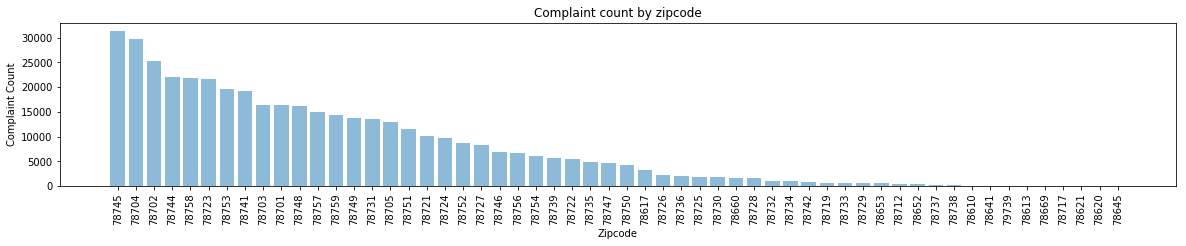

In [23]:
#plot complaint count by zipcode

# Create the ticks for our bar chart's x axis
plt.figure(figsize=(20,3))
x_axis = np.arange(len(complaint_count["zip_code"]))
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, complaint_count["zip_code"], rotation="vertical")

plt.bar(x_axis, complaint_count["complaint count"], alpha=0.5, align="edge")

plt.xlabel("Zipcode")
plt.ylabel("Complaint Count")
plt.title("Complaint count by zipcode")

plt.show()